In [13]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

## Задание 1
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [14]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

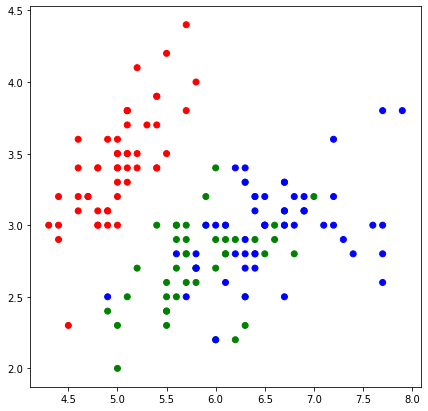

In [16]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [17]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [18]:
def knn(x_train, y_train, x_test, y_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    accuracy = sum(answers == y_test) / len(y_test)
    return answers, accuracy 

Добавляем веса в функцию knn


- $w(d) = q^{d}$,   $q \in (0,1)$;

In [19]:
def knn_w(x_train, y_train, x_test, y_test, k, q = 0.3):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1 * q ** d[0] # умножаем на вес
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    accuracy = sum(answers == y_test) / len(y_test)
    return answers, accuracy 

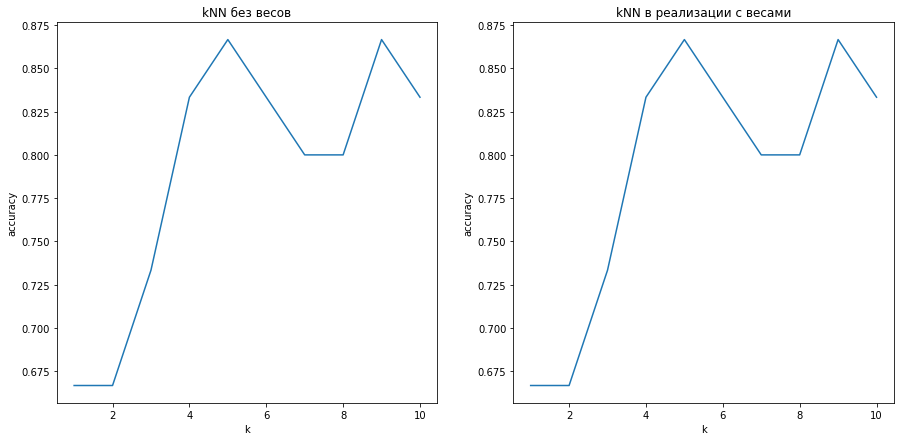

In [20]:
plt.figure(figsize = (15, 7))

k = 10
accuracy_list = []
for i in range(1, k + 1):
    accuracy_list.append(knn(X_train, y_train, X_test, y_test, i)[1])

accuracy_list_w = []
for i in range(1, k + 1):
    accuracy_list_w.append(knn_w(X_train, y_train, X_test, y_test, i, 0.01)[1])

plt.subplot(1,2,1)
plt.plot(list(xx for xx in range(1, k + 1)), accuracy_list);
plt.title('kNN без весов')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(list(xx for xx in range(1, k + 1)), accuracy_list);
plt.title('kNN в реализации с весами')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## Задание 2
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке)

In [21]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [22]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [23]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 10

In [24]:
def mean_square(centroids, clusters):
    mean_square_metric = 0
    j = 0
    for class_i in clusters.keys():
        for x_i in clusters[class_i]: 
            mean_square_metric += ((np.array(centroids[j]) - np.array(x_i)) **2).sum()
        j += 1
    return mean_square_metric

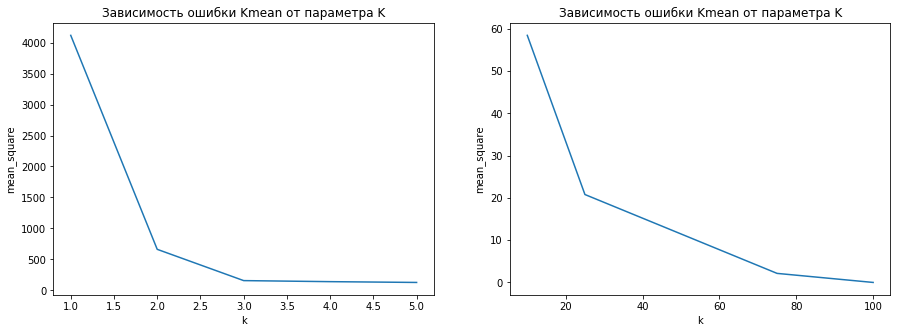

In [25]:
plt.figure(figsize = (15, 5))

k = [1, 2, 3, 4, 5]

mean_square_list = []
for i in k:
    centroids, clusters = kmeans(X, i, max_iterations, min_distance)
    mean_square_list.append(mean_square(centroids, clusters))

plt.subplot(1,2,1)
plt.plot(k, mean_square_list);
plt.title('Зависимость ошибки Kmean от параметра K')
plt.xlabel('k')
plt.ylabel('mean_square');

k = [10, 25, 75, 100]

mean_square_list = []
for i in k:
    centroids, clusters = kmeans(X, i, max_iterations, min_distance)
    mean_square_list.append(mean_square(centroids, clusters))

plt.subplot(1,2,2)
plt.plot(k, mean_square_list);
plt.title('Зависимость ошибки Kmean от параметра K')
plt.xlabel('k')
plt.ylabel('mean_square');

После кол-ва кластеров, хорошо описывающих текущее распределение данных, с их увеличением ошибка уменьшается не значительно.
При числе кластеров равном числе точек ошибка становится 0, что логично :)))